#CNN-Based Classification of Viral Pneumonia, Normal, and Covid Conditions from Medical Images

In [ ]:
#setting up by kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


##Loading Dataset

In [ ]:
#import dataset form kaggle api
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 94% 149M/158M [00:01<00:00, 90.7MB/s]
100% 158M/158M [00:01<00:00, 120MB/s] 


In [ ]:
#Extracting Zip File
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

##Import Libraries

In [ ]:
#importing necessary libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##List directories

In [ ]:
import os
base_dir = '/content/Covid19-dataset'
print("Content of base direcotory:")
print(os.listdir(base_dir))
print("Content of train direcotory:")
print(os.listdir(f'{base_dir}/train'))
print("Content of test direcotory:")
print(os.listdir(f'{base_dir}/test'))

Content of base direcotory:
['train', 'test']
Content of train direcotory:
['Covid', 'Viral Pneumonia', 'Normal']
Content of test direcotory:
['Covid', 'Viral Pneumonia', 'Normal']


In [ ]:
#Creating variable for directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
# Directory with training pictures
train_Viral_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')
train_Normal_dir = os.path.join(train_dir, 'Normal')
train_Covid_dir = os.path.join(train_dir, 'Covid')

# Directory with testing pictures
test_Viral_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')
test_normal_dir = os.path.join(train_dir, 'Normal')
test_Covid_dir = os.path.join(train_dir, 'Covid')

In [ ]:
train_Viral_Pneumonia_fnames = os.listdir( train_Viral_Pneumonia_dir )
train_Normal_fnames = os.listdir( train_Normal_dir)
train_Covid_fnames = os.listdir( train_Covid_dir)
print(train_Viral_Pneumonia_fnames[:10])
print(train_Normal_fnames[:10])
print(train_Covid_fnames[:10])

['013.jpeg', '083.jpeg', '02.jpeg', '045.jpeg', '010.jpeg', '055.jpeg', '063.jpeg', '077.jpeg', '021.jpeg', '067.jpeg']
['013.jpeg', '083.jpeg', '088.jpeg', '02.jpeg', '010.jpeg', '055.jpeg', '063.jpeg', '077.jpeg', '021.jpeg', '067.jpeg']
['033.png', '083.jpeg', '088.jpeg', '02.jpeg', '061.jpg', '045.jpeg', '055.jpeg', 'COVID-00011.jpg', '091.jpg', 'COVID-00033.jpg']


In [ ]:
print('total Normal Pneumonia images', len(os.listdir(train_Normal_dir)))
print('total Viral Pneumonia images', len(os.listdir(train_Viral_Pneumonia_dir)))
print('total Covid images', len(os.listdir(train_Covid_dir)))

total Normal Pneumonia images 70
total Viral Pneumonia images 70
total Covid images 111


##Visualizing Images

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
nrows = 4
ncols = 4
pic_index = 0

###Viral Pneumonia

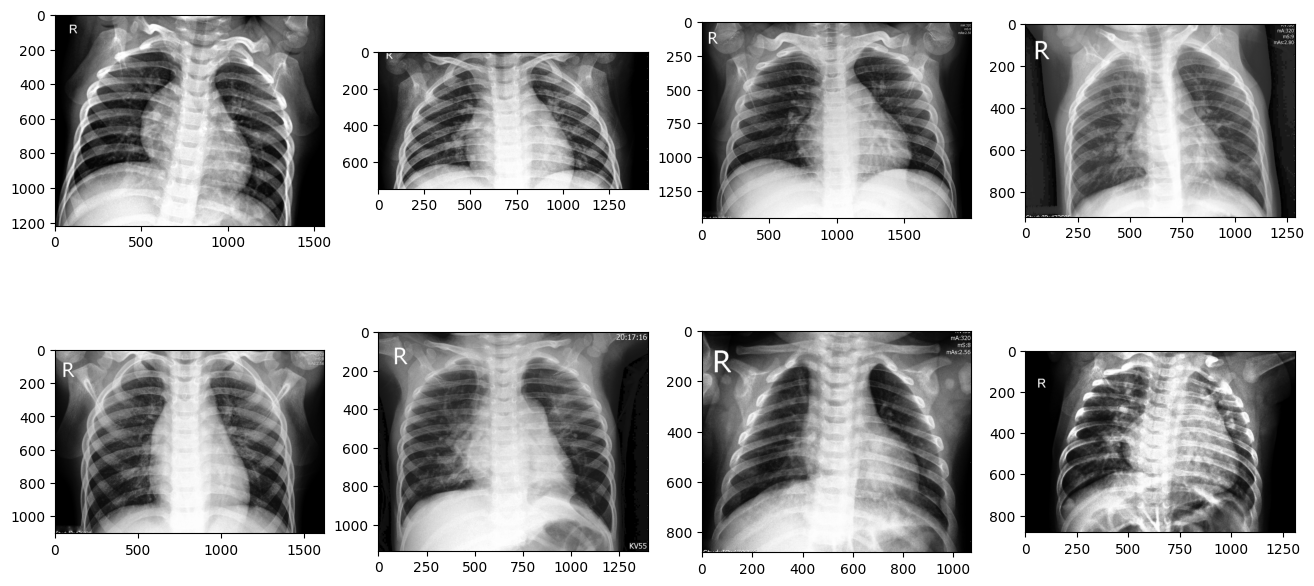

In [ ]:
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_Viral_Pneumonia = [os.path.join(train_Viral_Pneumonia_dir, fname)
                for fname in train_Viral_Pneumonia_fnames[ pic_index-8:pic_index]
               ]
next_Normal = [os.path.join(train_Normal_dir, fname)
                for fname in train_Normal_fnames[ pic_index-8:pic_index]
               ]
next_Covid = [os.path.join(train_Covid_dir, fname)
                for fname in train_Covid_fnames[ pic_index-8:pic_index]
               ]
for i, img_path in enumerate(next_Viral_Pneumonia):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

###Normal Images

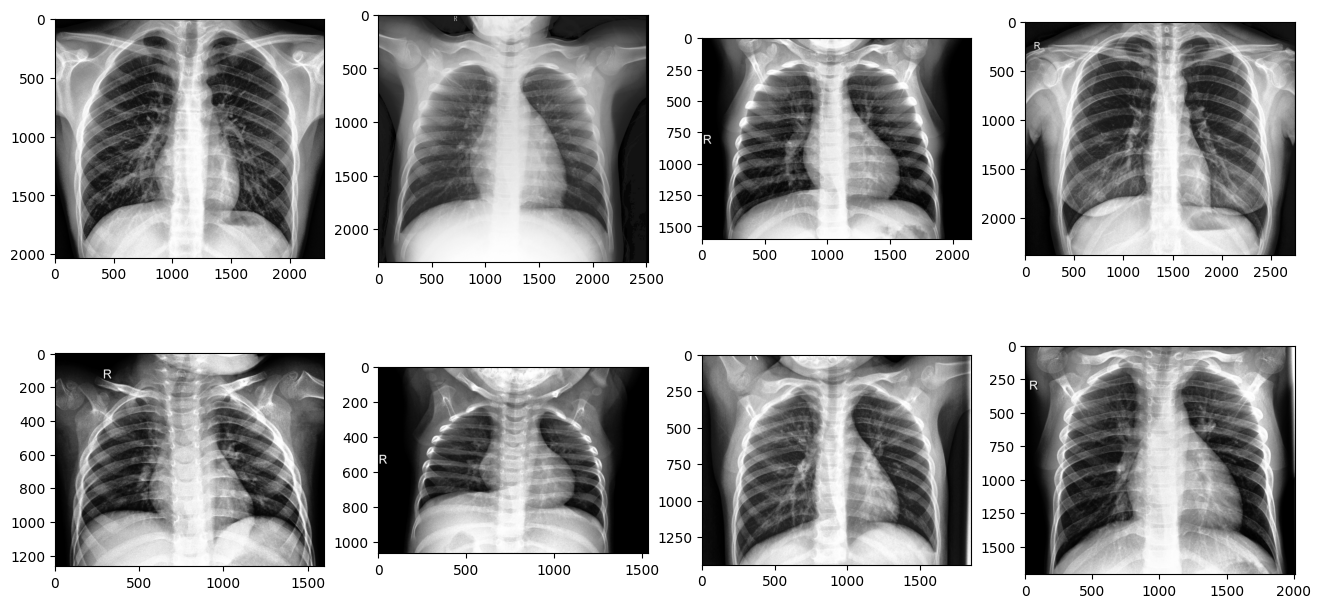

In [ ]:
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
for j, img_path in enumerate(next_Normal):
    sp = plt.subplot(nrows, ncols, j + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

###Covid Images

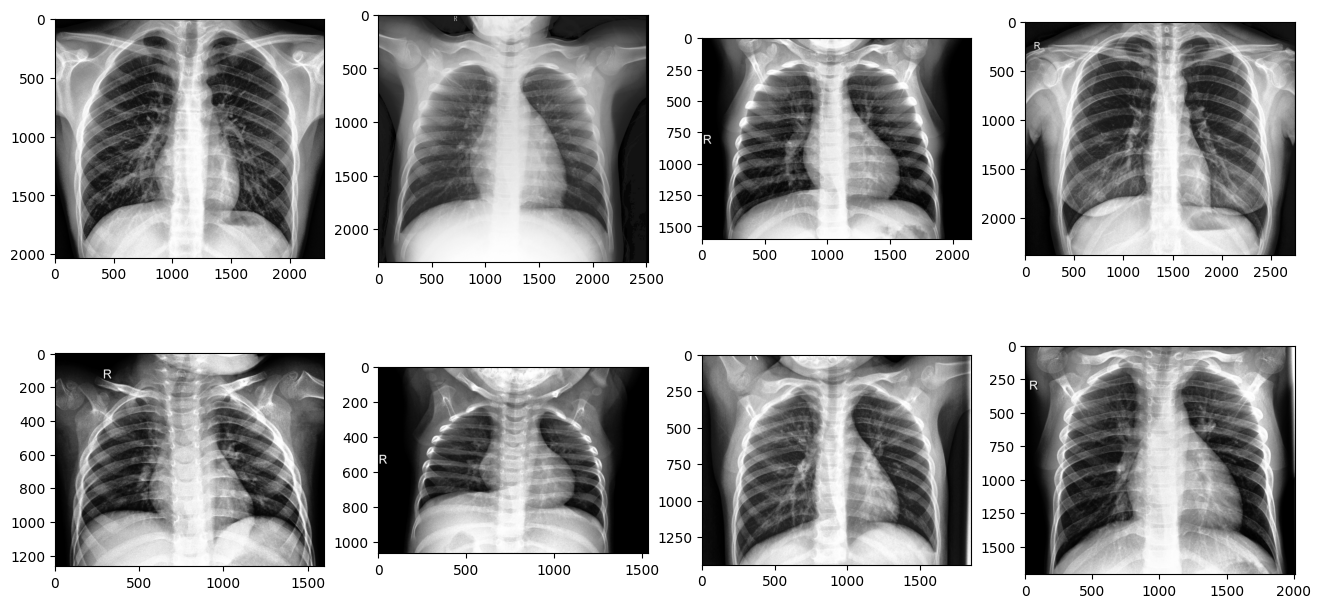

In [ ]:
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
for k, img_path in enumerate(next_Normal):
    sp = plt.subplot(nrows, ncols, k + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

###Creating CNN Architecutre

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neuron. It will contain a value 0,1 and 2 where 1 for Viral, 2 for Normal and 3 for Covid
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

##Data Generator for auto labeling

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                    )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


##Testing

In [ ]:
history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/20
13/13 [==============================] - 6s 484ms/step - loss: 0.4929 - accuracy: 0.7968 - val_loss: 0.5245 - val_accuracy: 0.7121
Epoch 2/20
13/13 [==============================] - 7s 530ms/step - loss: 0.5200 - accuracy: 0.7849 - val_loss: 0.7130 - val_accuracy: 0.6364
Epoch 3/20
13/13 [==============================] - 6s 474ms/step - loss: 0.3834 - accuracy: 0.8406 - val_loss: 0.6127 - val_accuracy: 0.7424
Epoch 4/20
13/13 [==============================] - 7s 526ms/step - loss: 0.5037 - accuracy: 0.7849 - val_loss: 0.4866 - val_accuracy: 0.7576
Epoch 5/20
13/13 [==============================] - 6s 449ms/step - loss: 0.3869 - accuracy: 0.8526 - val_loss: 0.6307 - val_accuracy: 0.6364
Epoch 6/20
13/13 [==============================] - 7s 537ms/step - loss: 0.4404 - accuracy: 0.8048 - val_loss: 0.7123 - val_accuracy: 0.6212
Epoch 7/20
13/13 [==============================] - 6s 469ms/step - loss: 0.4169 - accuracy: 0.8127 - val_loss: 0.6087 - val_accuracy: 0.6818
Epoch 

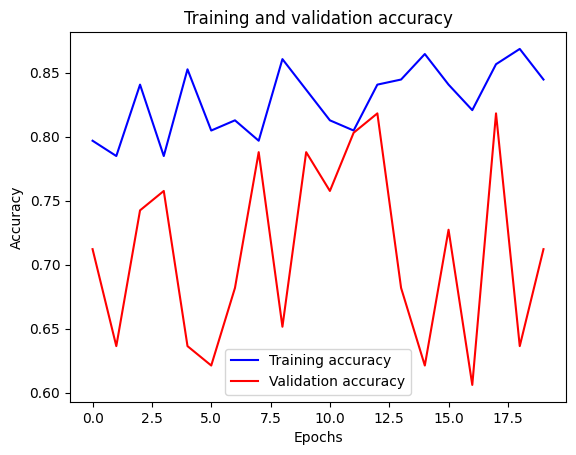

In [ ]:
#graph for compare train and validation accuracy

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(len(train_accuracy))

# Plot the training and validation accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Add labels and title
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


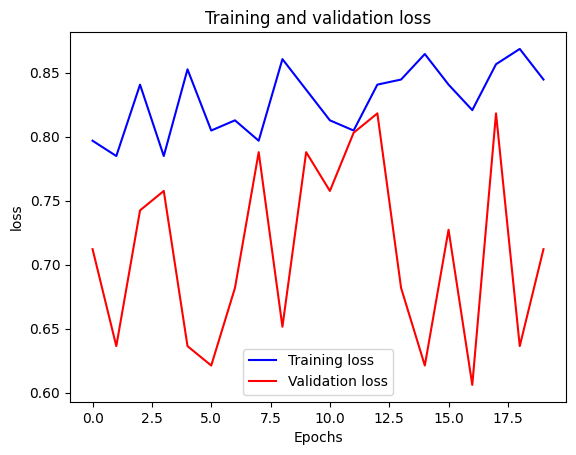

In [ ]:
# prompt: draw a graph for compare train and validation accuracy

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(train_accuracy))

# Plot the training and validation accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')

# Add labels and title
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

# Show the plot
plt.show()
